<center> Andrea Elliott <center>

This was completed as part of a weekly assignment for a data analytics class.

In [1]:
from pylab import * 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

I loaded a csv file and converted it to a data table. I then took a first pass look at the data.

In [264]:
covid = pd.read_csv('COVID_Wastewater.csv', sep = ',')
covid.head()


,FID,Site,Sample_Date,Week_Dates,Week,Day,Month,Test,Gene_Copies_per_Liter,Date_Updated
0,1,TP01,2020/04/06 00:00:00+00,2020/03/30-04/05,2020.14,Average,(03) March,covid,5000.00,2020/05/26 00:00:00+00
1,2,TP01,2020/04/13 00:00:00+00,2020/04/06-04/12,2020.15,Average,(04) April,covid,927625.00,2020/05/22 00:00:00+00
2,3,TP01,2020/04/20 00:00:00+00,2020/04/13-04/19,2020.16,Average,(04) April,covid,17264.50,2020/05/22 00:00:00+00
3,4,TP01,2020/04/27 00:00:00+00,2020/04/20-04/26,2020.17,Average,(04) April,covid,12695.29,2020/05/22 00:00:00+00
4,5,TP01,2020/05/04 00:00:00+00,2020/04/27-05/03,2020.18,Average,(04) April,covid,5000.00,2020/05/22 00:00:00+00


In [4]:
covid

,FID,Site,Sample_Date,Week_Dates,Week,Day,Month,Test,Gene_Copies_per_Liter,Date_Updated
0,1,TP01,2020/04/06 00:00:00+00,2020/03/30-04/05,2020.14,Average,(03) March,covid,5000.00,2020/05/26 00:00:00+00
1,2,TP01,2020/04/13 00:00:00+00,2020/04/06-04/12,2020.15,Average,(04) April,covid,927625.00,2020/05/22 00:00:00+00
2,3,TP01,2020/04/20 00:00:00+00,2020/04/13-04/19,2020.16,Average,(04) April,covid,17264.50,2020/05/22 00:00:00+00
3,4,TP01,2020/04/27 00:00:00+00,2020/04/20-04/26,2020.17,Average,(04) April,covid,12695.29,2020/05/22 00:00:00+00
4,5,TP01,2020/05/04 00:00:00+00,2020/04/27-05/03,2020.18,Average,(04) April,covid,5000.00,2020/05/22 00:00:00+00
...,...,...,...,...,...,...,...,...,...,...
338,348,Guadalupe,2021/02/14 06:59:59+00,2021/02/08-02/14/2021,2021.07,Average,(02) February,covid,453900.00,2021/02/19 06:59:59+00
339,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I explored my data a bit by looking at the column labels and using iloc to subset the data. I then found the mean gene copies of COVID per liter of wastewater across all sites and rounded the output to two decimals place. 

In [265]:
covid.columns

Index(['FID', 'Site', 'Sample_Date', 'Week_Dates', 'Week', 'Day', 'Month',
       'Test', 'Gene_Copies_per_Liter', 'Date_Updated'],
      dtype='object')

In [266]:
subset = covid.iloc[1:3, 2:5]
subset

,Sample_Date,Week_Dates,Week
1,2020/04/13 00:00:00+00,2020/04/06-04/12,2020.15
2,2020/04/20 00:00:00+00,2020/04/13-04/19,2020.16


In [62]:
print(round(mean(copiesPerLiter),2)) 

610187.47

By glancing at the output from covid.head(), there seems to be dramatic differences in gene copies across days and sites. As such, the mean calculated in the previous cell does not actually give me very much information. Just out of curiousity, I will find the minimum and maximum.

In [27]:
[print('min =', covid['Gene_Copies_per_Liter'].min()), print('max =', covid['Gene_Copies_per_Liter'].max())]

min = 5000.0
max = 41771543.33


[None, None]

I wanted to pull of the first 20 entries of just some of the columns to try to identify any pattern in the data. Is it organzied by site? week? number of gene copies in ascending order? None of these appears to be an organizing principle.

In [17]:
covid[['Site','Week','Gene_Copies_per_Liter']].head(20)

,Site,Week,Gene_Copies_per_Liter
0,TP01,2020.14,5000.00
1,TP01,2020.15,927625.00
2,TP01,2020.16,17264.50
3,TP01,2020.17,12695.29
4,TP01,2020.18,5000.00
5,TP01,2020.19,5000.00
6,TP01,2020.20,5000.00
7,TP01,2020.21,5000.00
8,TP02,2020.17,41771543.33
9,TP02,2020.18,5000.00


I will take another look at my data.  

In [49]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FID                    343 non-null    int64  
 1   Site                   338 non-null    object 
 2   Sample_Date            338 non-null    object 
 3   Week_Dates             338 non-null    object 
 4   Week                   338 non-null    float64
 5   Day                    338 non-null    object 
 6   Month                  338 non-null    object 
 7   Test                   338 non-null    object 
 8   Gene_Copies_per_Liter  338 non-null    float64
 9   Date_Updated           337 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 26.9+ KB


By comparing the non-null count to the total entries, I see that in most columns there are 4 NaNs. By looking at the covid.tail() output from above, I see that those entries all happen to fall in the final 4 rows. I will drop those rows, but first I will make a copy of my data.

In [267]:
covid_copy=covid.copy()
covid_copy.head()

,FID,Site,Sample_Date,Week_Dates,Week,Day,Month,Test,Gene_Copies_per_Liter,Date_Updated
0,1,TP01,2020/04/06 00:00:00+00,2020/03/30-04/05,2020.14,Average,(03) March,covid,5000.00,2020/05/26 00:00:00+00
1,2,TP01,2020/04/13 00:00:00+00,2020/04/06-04/12,2020.15,Average,(04) April,covid,927625.00,2020/05/22 00:00:00+00
2,3,TP01,2020/04/20 00:00:00+00,2020/04/13-04/19,2020.16,Average,(04) April,covid,17264.50,2020/05/22 00:00:00+00
3,4,TP01,2020/04/27 00:00:00+00,2020/04/20-04/26,2020.17,Average,(04) April,covid,12695.29,2020/05/22 00:00:00+00
4,5,TP01,2020/05/04 00:00:00+00,2020/04/27-05/03,2020.18,Average,(04) April,covid,5000.00,2020/05/22 00:00:00+00


In [268]:
covid_copy.drop(covid_copy.index[339:343])

,FID,Site,Sample_Date,Week_Dates,Week,Day,Month,Test,Gene_Copies_per_Liter,Date_Updated
0,1,TP01,2020/04/06 00:00:00+00,2020/03/30-04/05,2020.14,Average,(03) March,covid,5000.00,2020/05/26 00:00:00+00
1,2,TP01,2020/04/13 00:00:00+00,2020/04/06-04/12,2020.15,Average,(04) April,covid,927625.00,2020/05/22 00:00:00+00
2,3,TP01,2020/04/20 00:00:00+00,2020/04/13-04/19,2020.16,Average,(04) April,covid,17264.50,2020/05/22 00:00:00+00
3,4,TP01,2020/04/27 00:00:00+00,2020/04/20-04/26,2020.17,Average,(04) April,covid,12695.29,2020/05/22 00:00:00+00
4,5,TP01,2020/05/04 00:00:00+00,2020/04/27-05/03,2020.18,Average,(04) April,covid,5000.00,2020/05/22 00:00:00+00
...,...,...,...,...,...,...,...,...,...,...
334,344,TP04,2021/02/14 06:59:59+00,2021/02/08-02/14/2021,2021.07,Average,(02) February,covid,5000.00,2021/02/19 06:59:59+00
335,345,TP05,2021/02/14 06:59:59+00,2021/02/08-02/14/2021,2021.07,Average,(02) February,covid,447200.00,2021/02/19 06:59:59+00
336,346,TP06,2021/02/14 06:59:59+00,2021/02/08-02/14/2021,2021.07,Average,(02) February,covid,317400.00,2021/02/19 06:59:59+00
337,347,TP07,2021/02/14 06:59:59+00,2021/02/08-02/14/2021,2021.07,Average,(02) February,covid,351667.00,2021/02/19 06:59:59+00


The histograms below are only slightly informative. They show the distribution of the samples. The histogram labeled 'Week" has an odd appearance. This is because there are no entries between week 52 of 2020 (labeled 2020.52) and week 1 of 2020 (labeled 2021.0).

array([[<AxesSubplot:title={'center':'FID'}>,
        <AxesSubplot:title={'center':'Week'}>],
       [<AxesSubplot:title={'center':'Gene_Copies_per_Liter'}>,
        <AxesSubplot:>]], dtype=object)

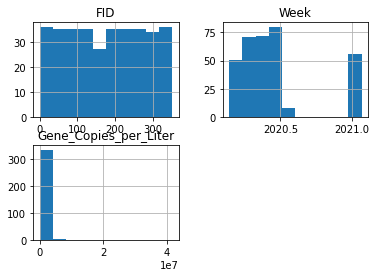

In [65]:
covid.hist()

I took a first look at central tendency measures. 

In [33]:
covid_copy.describe()

,FID,Week,Gene_Copies_per_Liter
count,343.000000,338.000000,3.380000e+02
mean,176.629738,2020.462101,6.101875e+05
std,102.750877,0.274989,2.396814e+06
min,1.000000,2020.140000,5.000000e+03
25%,86.500000,2020.280000,5.000000e+03
50%,180.000000,2020.380000,1.351665e+05
75%,265.500000,2020.490000,6.003332e+05
max,352.000000,2021.070000,4.177154e+07


I don't find the histograms above particularly informative. I would like to find mean gene copies per liter according to site. This may actually be interesting if the sites weren't coded.

In [269]:
bySite = covid_copy.groupby(['Site']).agg( {'Gene_Copies_per_Liter':['mean', 'median', 'min', 'max', 'std', 'var']})
bySite

Gene_Copies_per_Liter                                   \
                           mean      median     min          max   
Site                                                               
Guadalupe          9.379907e+05  397895.500  5000.0   5778500.00   
TP01               5.119697e+05  146466.500  5000.0   4148233.00   
TP02               1.516672e+06  328400.000  5000.0  41771543.33   
TP03               2.058800e+04    5000.000  5000.0    356467.00   
TP04               2.337491e+05   25964.785  5000.0   1730300.00   
TP05               4.344481e+05   88200.000  5000.0   4428800.00   
TP06               7.182415e+05  303433.500  5000.0   3909967.00   
TP07               4.883891e+05  351667.000  5000.0   2535367.00   

                                       
                    std           var  
Site                                   
Guadalupe  1.315980e+06  1.731802e+12  
TP01       9.050315e+05  8.190820e+11  
TP02       6.313115e+06  3.985543e+13  
TP03       6.748076e+04  4.553653e+09  
TP04       3.814111e+05  1.454744e+11  
TP05       9.408734e+05  8.852428e+11  
TP06       8.815124e+05  7.770642e+11  
TP07       6.389123e+05  4.082089e+11

I would like to plot only the mean values across sites. 

In [270]:
bySite.columns

MultiIndex([('Gene_Copies_per_Liter',   'mean'),
            ('Gene_Copies_per_Liter', 'median'),
            ('Gene_Copies_per_Liter',    'min'),
            ('Gene_Copies_per_Liter',    'max'),
            ('Gene_Copies_per_Liter',    'std'),
            ('Gene_Copies_per_Liter',    'var')],
           )

<AxesSubplot:xlabel='Site'>

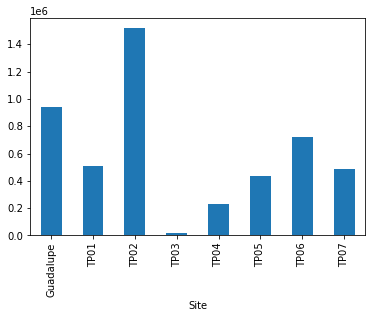

In [54]:
bySite[('Gene_Copies_per_Liter',   'mean')].plot.bar()

I could not figure out how to add errorbars without using matplotlib. I added a line at the beginning of my notebook to import matplotlib and then executed the code in the cells below to create a graph with error bars.

In [67]:
copies = bySite[('Gene_Copies_per_Liter',   'mean')]
copiesStd = bySite[('Gene_Copies_per_Liter',   'std')]
copiesStd

Site
Guadalupe    1.315980e+06
TP01         9.050315e+05
TP02         6.313115e+06
TP03         6.748076e+04
TP04         3.814111e+05
TP05         9.408734e+05
TP06         8.815124e+05
TP07         6.389123e+05
Name: (Gene_Copies_per_Liter, std), dtype: float64

I will transpose the dataframe so I can easily access the column headings.

In [271]:
bySiteT=bySite.T
siteLabel=bySiteT.columns
siteLabel 

Index(['Guadalupe', 'TP01', 'TP02', 'TP03', 'TP04', 'TP05', 'TP06', 'TP07'], dtype='object', name='Site')

Text(0, 0.5, 'Gene Copies Per Liter of Wastewater')

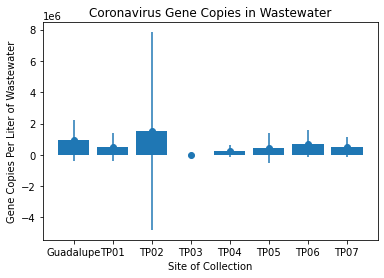

In [94]:
plt.bar(siteLabel, copies)
plt.errorbar(siteLabel, copies,yerr=copiesStd, fmt = 'o')
plt.title('Coronavirus Gene Copies in Wastewater')
plt.xlabel('Site of Collection')
plt.ylabel('Gene Copies Per Liter of Wastewater')

While the bar graphs are interesting, it would also be interesting to look at the change in gene copies per liter in wastewater over time. There are many ways to look at this. I could look at changes across time for each site using a line plot. However, for this exercise, I chose to get a composite look by averaging across the sites to look at the average gene copies per liter for each week. 

In [272]:
byDate = covid_copy.groupby(['Week']).agg( {'Gene_Copies_per_Liter':['mean', 'median', 'min', 'max', 'std', 'var']})
byDate.head()

Gene_Copies_per_Liter                                     \
                         mean      median       min          max   
Week                                                               
2020.14          5.000000e+03    5000.000    5000.0      5000.00   
2020.15          9.276250e+05  927625.000  927625.0    927625.00   
2020.16          1.113225e+04   11132.250    5000.0     17264.50   
2020.17          6.975217e+06   12328.645    5000.0  41771543.33   
2020.18          5.000000e+03    5000.000    5000.0      5000.00   

                                     
                  std           var  
Week                                 
2020.14           NaN           NaN  
2020.15           NaN           NaN  
2020.16  8.672311e+03  7.520898e+07  
2020.17  1.704666e+07  2.905885e+14  
2020.18  0.000000e+00  0.000000e+00

In [280]:
copiesDate = byDate[('Gene_Copies_per_Liter',   'mean')]
copiesDateStd = byDate[('Gene_Copies_per_Liter',   'std')]

In [277]:
byDateT=byDate.T
dateLabel=byDateT.columns
dateLabel #this will be x

Float64Index([2020.14, 2020.15, 2020.16, 2020.17, 2020.18, 2020.19,  2020.2,
              2020.21, 2020.22, 2020.23, 2020.24, 2020.25, 2020.26, 2020.27,
              2020.28, 2020.29,  2020.3, 2020.31, 2020.32, 2020.33, 2020.34,
              2020.35, 2020.36, 2020.37, 2020.38, 2020.39,  2020.4, 2020.41,
              2020.42, 2020.43, 2020.44, 2020.45, 2020.46, 2020.47, 2020.48,
              2020.49,  2020.5, 2020.51, 2020.52, 2021.01, 2021.02, 2021.03,
              2021.04, 2021.05, 2021.06, 2021.07],
             dtype='float64', name='Week')

Text(0, 0.5, 'Gene Copies Per Liter of Wastewater')

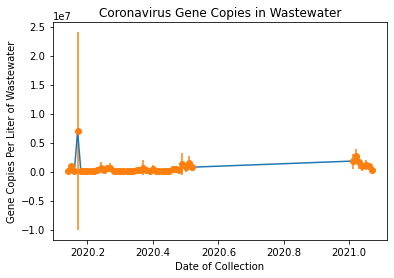

In [123]:
plt.plot(dateLabel, copiesDate)
plt.errorbar(dateLabel, copiesDate, yerr=copiesDateStd, fmt = 'o')
plt.title('Coronavirus Gene Copies in Wastewater')
plt.xlabel('Date of Collection')
plt.ylabel('Gene Copies Per Liter of Wastewater')

This isn't a very helpful plot for the same reason that the plot above isn't helpful: there are no entries between 2020.52 and 2021.0. In order to take a closer look at the data from 2020, I will adjust the axes. There is also an interesting spike in gene copies per liter around the 19th week. 

Text(0, 0.5, 'Gene Copies Per Liter of Wastewater')

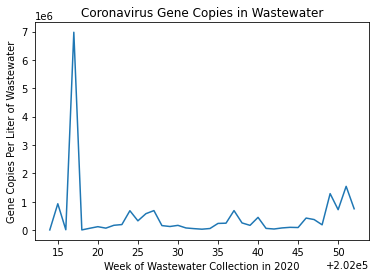

In [284]:
#I multiplied by 100 so at least the labels were easy to read at first glance. The "+2.02e5" can be ignored.
#that is a remnant of the '2020' part of the week.

plt.plot(dateLabel[0:39]*100, copies2020) 
plt.title('Coronavirus Gene Copies in Wastewater')
plt.xlabel('Week of Wastewater Collection in 2020')
plt.ylabel('Gene Copies Per Liter of Wastewater')

I created another plots to look at the values from 2021. I adjusted the y-axis so that the two plots were on the same scale.

(0.0, 7000000.0)

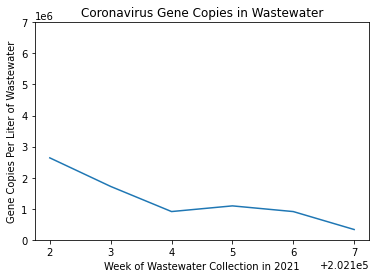

In [193]:
    plt.plot(dateLabel[40:]*100, copiesDate.iloc[40:]) 
    plt.title('Coronavirus Gene Copies in Wastewater')
    plt.xlabel('Week of Wastewater Collection in 2021')
    plt.ylabel('Gene Copies Per Liter of Wastewater')
    plt.ylim([0, 7000000])

<center><b> Discussion </b><center>
    

The errorbars tell me that there was a great deal of variability in the samples from TP02. This analysis would be more interesting if I knew the names of sites from which the data were gathered.
    
Given what we know about the timecourse of coronavirus infection in the U.S., these graphs are not reflective of the United States as a whole. The final graph shows a steady decrease in coronavirus gene copies in wastewater during the first 7 weeks of 2021. In reality, coronavirus cases peaked in the United States during this time. It is possible that the wastewater measurements do not accurately measure infection rates or lag behind the actual infection rates (perhaps th. Alternatively, it is possible these sites do not reflect the U.S. as a whole. Rates of infection varied greatly across the U.S.

<center><b> References </b><center>

City of Tempe (2020, November 12). COVID Wasterwater Results (Public View). Data.gov. Retrieved March 11, 2021 from https://catalog.data.gov/dataset/covid-wastewater-results-public-view. 

In [310]:
#I would like to show these graphs on a single x-axis
#This code successfully created ax, but I got an error when plotting in the next cell

y2020=np.arange(14,53)
y2021=np.arange(1,8)
ax=pd.concat([pd.DataFrame(y2020), pd.DataFrame(y2021)])

#the code below also created ax, but I got an error when plotting.
#ax =[pd.DataFrame([y2020], dtype=object), pd.DataFrame([y2021], dtype=object)]


In [313]:
len(ax)
len(copiesDate)

46

KeyError: (slice(None, None, None), None)

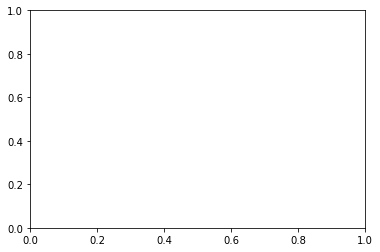

In [311]:
#I am having trouble getting this to plot. 
#I think the issue is related to how I'm creating and concating the arrays for the graph (see cell above). 
#feedback is appreciated.

plt.plot(ax, copiesDate)
plt.title('Coronavirus Gene Copies in Wastewater')
plt.xlabel('Date of Collection')
plt.ylabel('Gene Copies Per Liter of Wastewater')